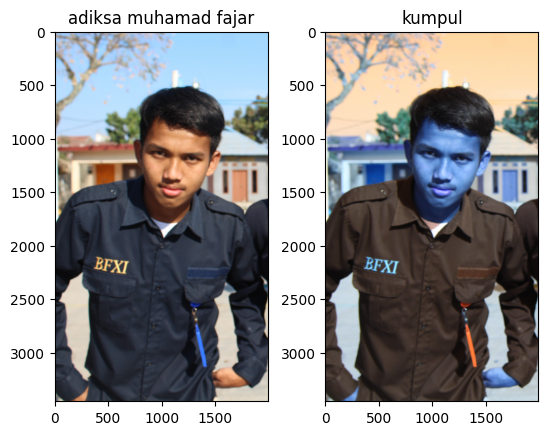

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt 
#tampilkan kedua gambar

# panggil dan konversi warna agar sesuai dengan Matplotlib
selfie = cv2.imread('selfie.jpg')
selfie = cv2.cvtColor(selfie, cv2.COLOR_BGR2RGB)
# panggil dan konversi warna agar sesuai dengan Matplotlib
kumpul = cv2.imread('kumpul.jpg')
kumpul = cv2.cvtColor(selfie, cv2.COLOR_BGR2RGB) 
plt.subplot(121),plt.imshow(selfie), plt.title('adiksa muhamad fajar')
plt.subplot(122),plt.imshow(kumpul), plt.title('kumpul')
plt.show()

Jumlah objek ditemukan: 1


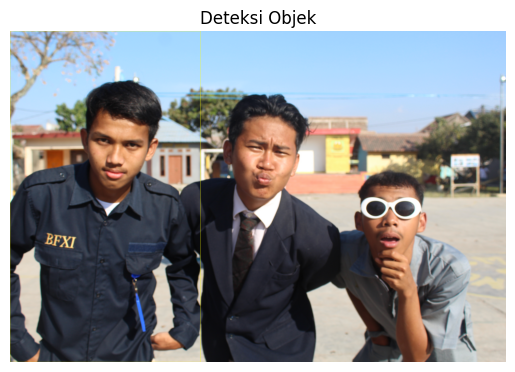

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Membaca gambar utuh untuk dicari
img_rgb = cv2.imread('kumpul.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Membaca template
template = cv2.imread('selfie.jpg', 0)

# Ukuran template. Ukuran ini akan digunakan untuk menggambar kotak
w, h = template.shape[::-1]

# Menggunakan metode COEFF-NORMALIZED
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

# Nilai threshold atau ambang batas deteksi kemiripan titik.
# Lakukan eksperimen dengan merubah nilai ini
threshold = 0.15
loc = np.where(res >= threshold)

# Membuat array kosong untuk menyimpan lokasi-lokasi dari hasil deteksi
lspoint = []
lspoint2 = []
count = 0  # Untuk menyimpan jumlah matching yang ditemukan
for pt in zip(*loc[::-1]):
    # Jika sudah ada, skip lokasi tersebut
    if pt[0] not in lspoint and pt[1] not in lspoint2:
        # Gambar persegi warna kuning dengan ketebalan dua poin
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0, 255, 255), 2)
        for i in range((pt[0] - 9), (pt[0] + 9), 1):
            # Tambahkan koordinat x ke list
            lspoint.append(i)
        for k in range((pt[1] - 9), (pt[1] + 9), 1):
            # Tambahkan koordinat y ke list
            lspoint2.append(k)
        count += 1  # Berapa jumlah matching yang ditemukan?
    else:
        continue
print("Jumlah objek ditemukan:", count)

# Tampilkan dengan imshow dari matplotlib
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
plt.title("Deteksi Objek")
plt.axis('off')
plt.show()